# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Ученая степень', 'Среднее специальное', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Торговля', 'Наука', 'Развлечения/Искусство', 'Недвижимость', 'Салоны красоты и здоровья', 'Образование', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Логистика', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Нефтегазовая промышленность', 'Энергетика', 'Транспорт', 'Информационные технологии', 'Строительство', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Банк/Финансы', 'Другие сферы', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Маркетинг'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

In [15]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Ученая степень', 'Среднее специальное', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Торговля', 'Наука', 'Развлечения/Искусство', 'Недвижимость', 'Салоны красоты и здоровья', 'Образование', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Логистика', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Нефтегазовая промышленность', 'Энергетика', 'Транспорт', 'Информационные технологии', 'Строительство', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Банк/Финансы', 'Другие сферы', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Маркетинг'}


GEN_TITLE


Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
Начнем с самого сложного столбца - PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64
Всего 600 не пустых значений. Исходим из содержания столбца - количество ранее утилизированных карт. То есть пропуск означает
отсутствие утилизированных карт, поэтому смело заполняем пропуски нулями.
Остаются менее одиозные случаи:
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
WORK_TIME                     27416 non-null float64
Всего строк у нас 30133.
Здесь не очень понятно пропуски характерны для одной и той же строки или они просто разбросаны по строкам в произвольном порядке.
Если первый вариант - то мы теряем 2717 строк (9%), что не очень критично на мой взгляд, т.е. можно выкинуть эти строки.
Если же второй вариант, то на это пойти нельзя (слишком много строк теряем), значит нужно смотреть чем заполнить данные.
По факту логичнее сначала удалить строки с пропусками из второй группы, посмотреть как ведет себя модель, какие результаты 
мы получаем и если все более менее нормально, то и заполнять пропуски будет не обязательно.
С другой стороны если столбец не очень важный, например, рабочее время, то его можно смело заполнить средним или медианным значением.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Есть.
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_PROVINCE         30133 non-null object
POSTAL_ADDRESS_PROVINCE       30133 non-null object
TP_PROVINCE                   29543 non-null object
REGION_NM                     30131 non-null object
и др.
Про "ложные" категориальные признаки (неправильно распознанные числа) уже было сказано в самом задании - нужно правильно распознать.
Из оставшихся действительно категориальных признаков большую часть я бы выбросил, прежде всего, столбцы с регионами о округами.
Их невозможно переделать в числовой вид, а в виде OneHotEncoding они будут слишком громоздкими.
Поэтому предлагаю оставить самое важное - MARITAL_STATUS и EDUCATION. Семейный доход в принципе повторяет персональный доход, 
поэтому им спокойно жертвуем. Направление деятельности внутри компании и другие столбцы про место в компании не ососбо важны, 
поэтому тоже удаляем.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляла идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [32]:
def preproc_data(df_input):
    df_output = df_input.copy()
    # удаляем столбцы, которые считаем "лишними", то есть они либо содержат строковые данные, либо дублируются.
    df_output = df_output.drop(['AGREEMENT_RK', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL'], axis=1)
    df_output = df_output.drop(['JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'], axis=1)
    
    # вставляем нули в столбец про карты
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    # проводим замены в неправильно распознанных столбцах
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # заполняем пропуски, которые остаются из-за столбца WORK_TIME, не думаю, что этот столбец вообще как-то влияет, поэтому
    # заполним медианнным значением
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()
    
    #Работаем с двуми оставшимися строковыми столбцами, преобразуя их в бинарные значения при помощи OneHotEncoding
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS'])
               
    return df_output

In [33]:
df1 = preproc_data(df)
df1.info()
df1.head()
   #остался только строковый sample, но он уйдет при следующей операции, пропусков нет. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
TARGET                                      30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [62]:
x = df_train_preproc.drop('TARGET', axis=1)
x_test = df_test_preproc.drop('TARGET', axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

print(x.shape)
print(x_test.shape)
print(y.shape)
print(y_test.shape)

(15223, 49)
(14910, 49)
(15223,)
(14910,)


#### Задание 5. Обучение и оценка качества разных моделей

In [63]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

#x, x_test, y, y_test = train_test_split(df_train_preproc+df_test_preproc, y, test_size=0.33, random_state=42)


In [64]:
print(x.shape)
print(x_test.shape)
print(y.shape)
print(y_test.shape)

(15223, 49)
(14910, 49)
(15223,)
(14910,)


In [65]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [99]:
#LogisticRegression
model = LogisticRegression()                     
model.fit(x, y)                      
predict = model.predict(x_test)  

In [107]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))
pr_sc0 = precision_score(y_test, predict)
re_sc0 = recall_score(y_test, predict)
acc_sc0 = accuracy_score(y_test, predict)
f1_sc0 = f1_score(y_test, predict)

precision 0.2631578947368421
recall 0.002857142857142857
accuracy 0.8820254862508383
f1 0.005652911249293386


In [102]:
#DecisionTreeClassifier
model1 = DecisionTreeClassifier()                     
model1.fit(x, y)                      
predict1 = model1.predict(x_test) 

In [108]:
print('precision', precision_score(y_test, predict1))
print('recall', recall_score(y_test, predict1))
print('accuracy', accuracy_score(y_test, predict1))
print('f1', f1_score(y_test, predict1))
pr_sc1 = precision_score(y_test, predict1)
re_sc1 = recall_score(y_test, predict1)
acc_sc1 = accuracy_score(y_test, predict1)
f1_sc1 = f1_score(y_test, predict1)

precision 0.16928197812648596
recall 0.20342857142857143
accuracy 0.7893360160965794
f1 0.18479107189203217


In [105]:
#RandomForestClassifier
model2 = RandomForestClassifier()                     
model2.fit(x, y)                      
predict2 = model2.predict(x_test) 

In [109]:
print('precision', precision_score(y_test, predict2))
print('recall', recall_score(y_test, predict2))
print('accuracy', accuracy_score(y_test, predict2))
print('f1', f1_score(y_test, predict2))
pr_sc2 = precision_score(y_test, predict2)
re_sc2 = recall_score(y_test, predict2)
acc_sc2 = accuracy_score(y_test, predict2)
f1_sc2 = f1_score(y_test, predict2)

precision 0.22105263157894736
recall 0.012
accuracy 0.8790744466800805
f1 0.02276422764227642


In [119]:
pr_sc = [pr_sc0, pr_sc1, pr_sc2]
re_sc = [re_sc0, re_sc1, re_sc2]
acc_sc = [acc_sc0, acc_sc1, acc_sc2]
f1_sc = [f1_sc0, f1_sc1, f1_sc2]
ID_m = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
df_sc = pd.DataFrame(
    {'ID_model': ID_m,
     'precision_score': pr_sc,
     'recall_score': re_sc,
     'accuracy_score': acc_sc,
     'f1_score': f1_sc
    })
df_sc

,ID_model,precision_score,recall_score,accuracy_score,f1_score
0,LogisticRegression,0.263158,0.002857,0.882025,0.005653
1,DecisionTreeClassifier,0.169282,0.203429,0.789336,0.184791
2,RandomForestClassifier,0.221053,0.012000,0.879074,0.022764


(0, 1.5)

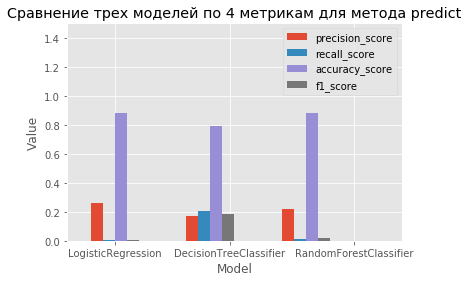

In [172]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
df_sc.plot(kind='bar');
plt.title('Сравнение трех моделей по 4 метрикам для метода predict');
plt.legend(loc='upper right')
plt.ylabel("Value")
plt.xlabel('Model')
plt.xticks([0, 1.2, 2.5], ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier'], rotation='horizontal')
plt.xlim((-0.5, 3))
plt.ylim((0, 1.5))



In [180]:
#LogisticRegression
predict_proba = model.predict_proba(x_test)
predict_proba[:,1]

array([0.10749342, 0.06036227, 0.17909975, ..., 0.1352439 , 0.09165701,
       0.16838605])

In [181]:
#DecisionTreeClassifier
predict_proba1 = model1.predict_proba(x_test)
predict_proba1[:,1]

array([0., 0., 0., ..., 0., 0., 1.])

In [182]:
#RandomForestClassifier
predict_proba2 = model2.predict_proba(x_test)
predict_proba2[:,1]

array([0.1, 0. , 0.1, ..., 0.3, 0. , 0.2])

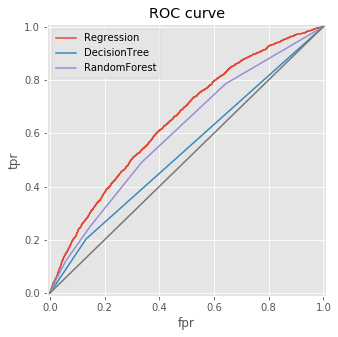

roc_auc для модели LogisticRegression 0.6493179331306991
roc_auc для модели DecisionTreeClassifier 0.5353389057750759
roc_auc для модели RandomForestClassifier 0.6048077507598784


In [219]:
# Построить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba2[:,1])

plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['Regression',
            'DecisionTree',
            'RandomForest'],
            loc='upper left')


plt.show()
print ('roc_auc для модели LogisticRegression', roc_auc_score(y_test, predict_proba[:,1]))
print ('roc_auc для модели DecisionTreeClassifier', roc_auc_score(y_test, predict_proba1[:,1]))
print ('roc_auc для модели RandomForestClassifier', roc_auc_score(y_test, predict_proba2[:,1]))

In [237]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

lr = LogisticRegression()
cvs = cross_val_score(
    lr,
    x,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели LogisticRegression', np.mean(cvs))

Среднее значение roc_auc для модели LogisticRegression 0.6354861632684713


In [238]:
dtc = DecisionTreeClassifier()
cvs1 = cross_val_score(
    dtc,
    x,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели DecisionTreeClassifier', np.mean(cvs1))

Среднее значение roc_auc для модели DecisionTreeClassifier 0.5238723393503715


In [239]:
rfc = RandomForestClassifier()
cvs2 = cross_val_score(
    rfc,
    x,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели RandomForestClassifier', np.mean(cvs2))

Среднее значение roc_auc для модели RandomForestClassifier 0.6012455643304344


In [240]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

#Лучшей моделью по среднему значению roc_auc получилась LogisticRegression
#Еще раз проверяем ее на test выборке

#LogisticRegression
model = LogisticRegression()                     
model.fit(x, y)                      
predict = model.predict(x_test)  
predict_proba = model.predict_proba(x_test)
predict_proba[:,1]

array([0.10749342, 0.06036227, 0.17909975, ..., 0.1352439 , 0.09165701,
       0.16838605])

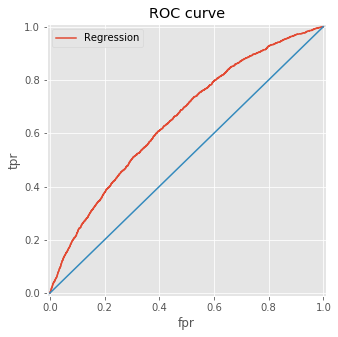

roc_auc для модели LogisticRegression 0.6493179331306991


In [242]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])


plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['Regression'],
            loc='upper left')


plt.show()
print ('roc_auc для модели LogisticRegression', roc_auc_score(y_test, predict_proba[:,1]))


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)